In [73]:
import pandas as pd 
import sound_to_features
import librosa
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
#emotion_code = int(file.split("-")[2])
df = pd.DataFrame(columns=['vol', 'pitch', 'tempo', "beats", 'zcr', 'emotion', 'intensity'])
df

,vol,pitch,tempo,beats,zcr,emotion,intensity


In [75]:
# path = 'archive/Actor_01/03-01-07-02-01-01-01.wav'
# file_name = '03-01-07-02-01-01-01.wav'
def add_to_df(path, file_name, df):
    y, sr = librosa.load(path)
    features = sound_to_features.get_features(y, sr)
    emotion = int(file_name.split('-')[2])
    intensity = int(file_name.split('-')[3])
    row = pd.DataFrame([{
        "vol": features["volume"],
        "pitch": features["pitch"],
        "tempo": features["tempo"],
        "beats": features["beats"],
        "zcr": features["ZCR"],
        'emotion': emotion,
        'intensity': intensity
    }])
    df = pd.concat([df, row], ignore_index = True)

    return df


In [76]:
for i in range(1,25):
    if i < 10:
        num = f"0{i}"
    else:
        num = str(i)
    
    for file_name in os.listdir(f"archive/Actor_{num}"):
        df = add_to_df(f"archive/Actor_{num}/{file_name}", file_name,df)

df.head()

C:\Users\callu\AppData\Local\Temp\ipykernel_8064\1771842048.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, row], ignore_index = True)


,vol,pitch,tempo,beats,zcr,emotion,intensity
0,0.002256,88.506851,80.749512,0.743039,0.372712,1,1
1,0.002419,91.076464,161.499023,0.383129,0.380551,1,1
2,0.002809,90.451596,80.749512,0.743039,0.399123,1,1
3,0.002617,84.540114,64.599609,0.905578,0.396930,1,1
4,0.001653,86.179753,117.453835,0.510839,0.356985,2,1


In [77]:
df.head()
df


,vol,pitch,tempo,beats,zcr,emotion,intensity
0,0.002256,88.506851,80.749512,0.743039,0.372712,1,1
1,0.002419,91.076464,161.499023,0.383129,0.380551,1,1
2,0.002809,90.451596,80.749512,0.743039,0.399123,1,1
3,0.002617,84.540114,64.599609,0.905578,0.396930,1,1
4,0.001653,86.179753,117.453835,0.510839,0.356985,2,1
...,...,...,...,...,...,...,...
1435,0.007605,199.129420,80.749512,0.743039,0.308893,8,1
1436,0.011720,176.997624,135.999178,0.425699,0.278016,8,2
1437,0.010103,187.410397,184.570312,0.319274,0.280623,8,2
1438,0.013722,172.071465,143.554688,0.441179,0.241908,8,2


In [78]:
emotion_means = df.groupby("emotion")[["vol", "pitch", "tempo", "beats", "zcr"]].mean()
emotion_means

,vol,pitch,tempo,beats,zcr
emotion,,,,,
1,0.003175,137.757731,117.912127,0.576150,0.271432
2,0.002666,142.966966,131.246026,0.502887,0.253027
3,0.012380,164.170614,124.500572,0.538486,0.248470
4,0.005146,152.912115,128.904217,0.522426,0.258122
5,0.026401,165.355273,128.877796,0.509514,0.245599
6,0.016032,169.631286,124.515216,0.539981,0.238799
7,0.006366,150.245949,129.317192,0.523596,0.256584
8,0.008371,156.316153,115.948220,0.583051,0.257605


In [79]:
emotion_map = {
    1: "neutral",
    2: "calm",
    3: "happy",
    4: "sad",
    5: "angry",
    6: "fearful",
    7: "disgust",
    8: "surprised"
}

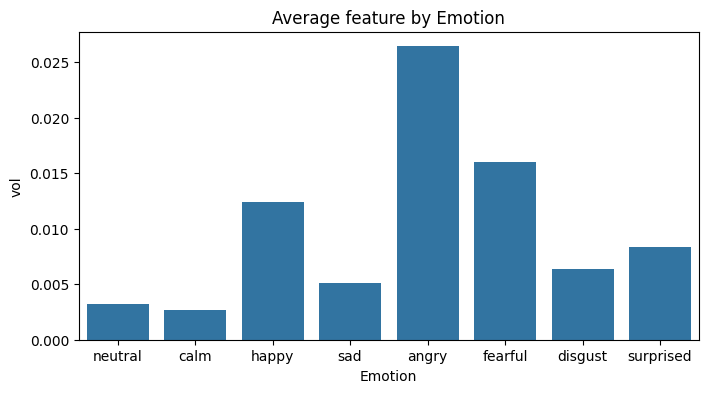

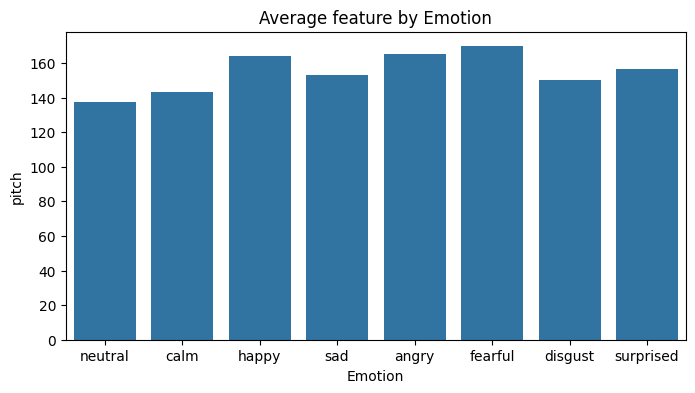

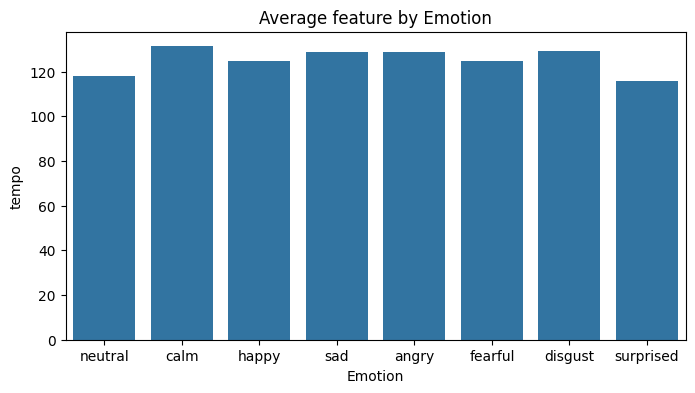

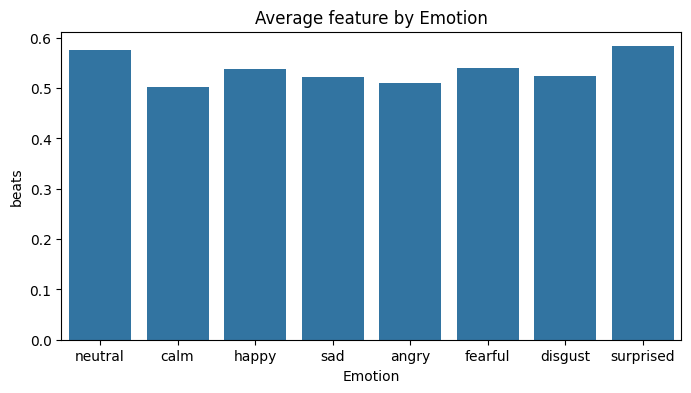

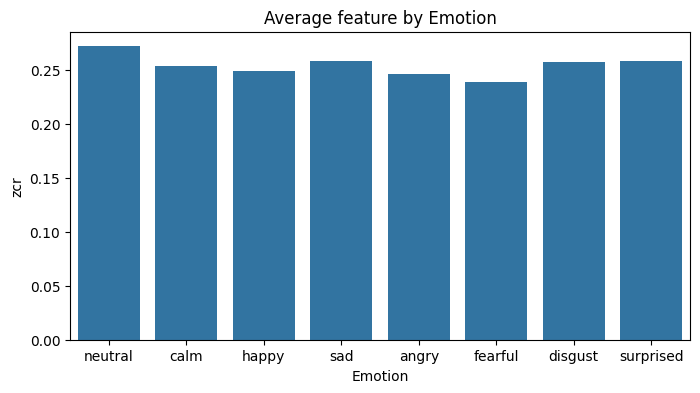

In [80]:
for feature in emotion_means.columns:
    plt.figure(figsize=(8,4))
    sns.barplot(x=emotion_map, y=emotion_means[feature])
    plt.title(f"Average feature by Emotion")
    plt.ylabel(feature)
    plt.xlabel("Emotion")
    plt.show()